In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [43]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [8]:
offset = MonthEnd()
curr_month = report.index[-1].date()
prev_month = curr_month - offset

<h3>Отчётный месяц</h3>

In [36]:
'{:%B %Y}'.format(curr_month)

'January 2017'

<h2>Основная таблица</h2>

In [44]:
report

channels                             goals                       
             yandex google go.mail.ru  bry  cpc order basket contact measure
2016-01-31     3334   1157        512  114  847     6    160     367      16
2016-02-29     4471   1253        537  123  316    19    264     533      10
2016-03-31     5630   1683        597   88  543    22    217     571      20
2016-04-30     5946   1641        530  101  514    24    196     484      12
2016-05-31     5887   1470        479   69  228    21    243     485      27
2016-06-30     5913   1134        351   76    0    12    257     478      17
2016-07-31     5166   1108        364   58    0    15    213     396      20
2016-08-31     4689   1120        348   59    0    30    308     349      18
2016-09-30     4244   1071        302   53    0     6    238     321      15
2016-10-31     4153   1711        329   38    0     6    210     357      28
2016-11-30     3853   2491        304   46    0    14    224     436      21
2016-12-31     2781   2551        291  606    0    16    139     358      15
2017-01-31     2949   3084        375  511    0     4    243     355       8

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [45]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2017-01-31      168    533         84 -95   0   -12    104      -3      -7

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

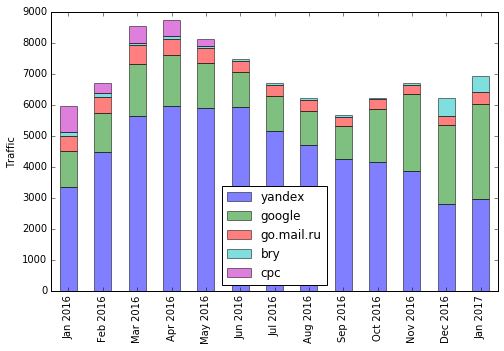

In [46]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
report.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in report.index]);

<h3>Линейная диаграмма изменений трафика</h3>

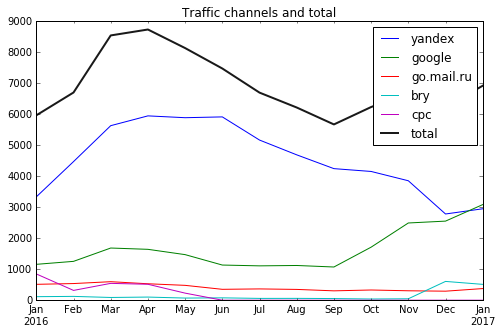

In [47]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
report.channels.plot(ax=ax);
report.channels.sum(axis=1).plot(color=(0,0,0), linewidth=2, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова, отсортированные по количеству визитов</h3>

In [27]:
data[['keyword', 'visit']].sort_values(by='visit', ascending=False)

,keyword,visit
971,(not set),2104
736,np - /?cnt=catalog&r=2438,1340
737,np - /?cnt=catalog&r=1428,548
738,np - /,361
739,np - /?pid=pokaz,134
740,np - /?cnt=catalog&r=1010,81
543,купить раздвижные двери межкомнатные дешево,59
972,межкомнатные двери недорого с установкой под ключ,54
741,дверное полотно,43
742,полотно двери,42
